In [10]:
import numpy as np
import pandas as pd
import statistics as sta
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [8]:
df=pd.read_csv("C:\\Users\\Prime\\Downloads\\Boston.csv")

df.head()

,Index,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
df.shape

(506, 15)

In [20]:
x=df.drop(['Index',"medv"],axis=1)

x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [22]:
y=df['medv']

y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

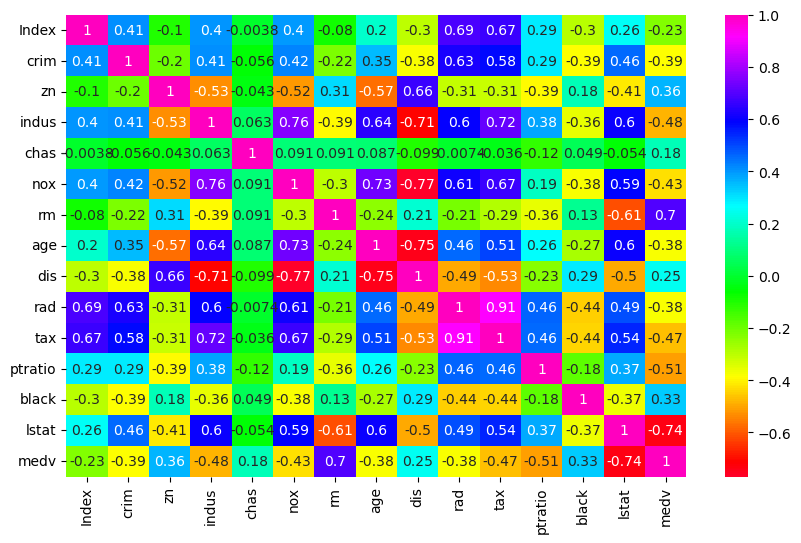

In [26]:
plt.figure(figsize=(10,6))

cor=df.corr()
sns.heatmap(cor,annot=True,cmap="gist_rainbow")
plt.show()

In [28]:
##between x there should not be any relation more than 0.5 


cor_target=abs(cor['medv'])

#selecting highly correlated features

relevent_features=cor_target[cor_target>0.5]
relevent_features

rm         0.695360
ptratio    0.507787
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

In [30]:
print(df[["rm","ptratio"]].corr())

print(df[["rm","lstat"]].corr())

print(df[["ptratio","lstat"]].corr())

               rm   ptratio
rm       1.000000 -0.355501
ptratio -0.355501  1.000000
             rm     lstat
rm     1.000000 -0.613808
lstat -0.613808  1.000000
          ptratio     lstat
ptratio  1.000000  0.374044
lstat    0.374044  1.000000
